분류 : Classicfication
- 로지스틱회귀
- 결정트리
- KNN

로지스틱회귀
  - 이진 분류문제를 해결하기 위해서 사용하는 통계 및 머신러닝 기법
  - 선형회귀랑 비슷하지만 결과값이 연속적인 값이 아니라 0 ~ 1사이의 확률로 제한
  - 특징
    - Sigmoid 함수사용 : 결과값이 0~1사이를 통과하도록 확률 값으로 변환
    - 손실함수 Binary Cross Entropy 손실함수를 최소화 하도록 학습
    

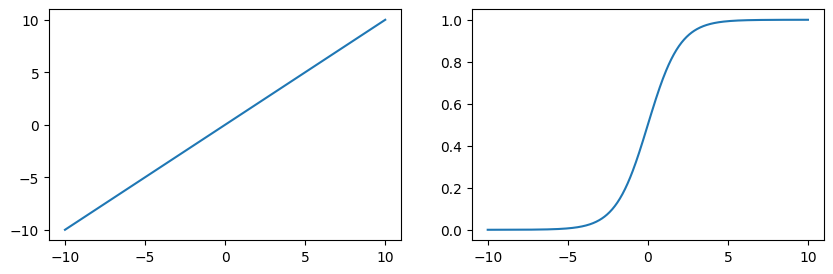

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 함수 정의
def sigmoid(z):
  return 1/ ( 1+np.exp(-z))

# 입력값
z = np.linspace(-10,10,500) # 균등분포

# 오리지널0
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(z,z)
# 시그모이드
plt.subplot(1,2,2)
plt.plot(z,sigmoid(z))

plt.show()

In [8]:
# 분류 데이터 생성
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 데이터를 학습용 데이터, 검증용 데이터로 분할 --> train_test_split
x, y = make_classification(n_samples=1000,
                           n_features=2, # 특징 클래스 수
                           n_informative=2, # 유의미한 특징 수
                           n_redundant=0,  # 상관관계 있는 특징 수
                           random_state=42  # 랜던 시드값 -- 고정
                           )
# 학습용, 검증용 분리
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2, random_state=42)

# 모델 선택
model = LogisticRegression()
# 학습
model.fit(x_train,y_train)

# 예측
y_pred = model.predict(x_test)


In [12]:
# 모델 평가
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.88


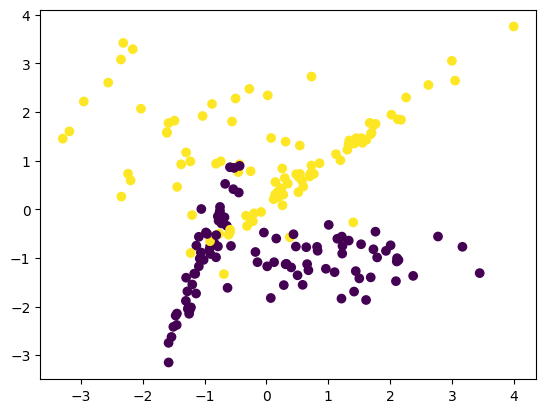

In [13]:
# 검증데이터의 분포
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
plt.show()

In [14]:
# 결정 경계

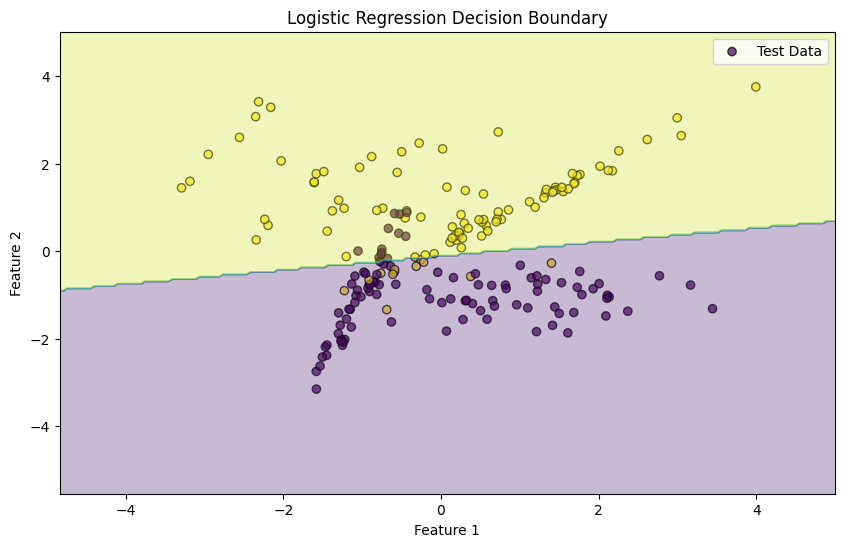

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='viridis', edgecolors='k', alpha=0.7, label="Test Data")

# 결정 경계 그리기
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

타이타닉 데이터로 생존자 분류 모델 만들기

In [17]:
import pandas as pd
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


- PassengerId: 승객 ID (기본키 역할)
- Survived: 생존 여부 (0 = 사망, 1 = 생존)
- Pclass: 선실 등급 (1 = 1등석, 2 = 2등석, 3 = 3등석)
- Name: 승객 이름
- Sex: 성별
- Age: 나이
- SibSp: 동반한 형제자매/배우자 수
- Parch: 동반한 부모/자녀 수
- Ticket: 티켓 번호
- Fare: 요금
- Cabin: 객실 번호
- Embarked: 탑승 항구 (C = Cherbourg, Q = Queenstown, S = Southampton)

데이터 탐색

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
data['Embarked'].mode()[0]  # 최빈값

'S'

데이터 전처리

In [24]:
data['Age'].fillna(data['Age'].median(),inplace=True)  # 수치형데이터의 결측치 처리는 중위수
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True) # 범주형 데이터는 최빈값으로
data['Cabin'].fillna(data['Cabin'].mode()[0],inplace=True) # 범주형 데이터는 최빈값으로

<ipython-input-24-c363ad535c5c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(),inplace=True)  # 수치형데이터의 결측치 처리는 중위수
<ipython-input-24-c363ad535c5c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [26]:
# 불필요한 열을 제거
data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [32]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'],drop_first=True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


독립변수(x) 와 종속변수(y) 분리

In [33]:
x = data.drop('Survived',axis=1)
y = data['Survived']

데이터 분할


In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

로지스틱회귀 모델 훈련

In [36]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

예측 및 평가

In [43]:
predict = model.predict(x_test)
accuracy_score(predict,y_test)

0.8100558659217877

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
331,1,45.5,0,0,28.5000,True,False,True
733,2,23.0,0,0,13.0000,True,False,True
382,3,32.0,0,0,7.9250,True,False,True
704,3,26.0,1,0,7.8542,True,False,True
813,3,6.0,4,2,31.2750,False,False,True
...,...,...,...,...,...,...,...,...
106,3,21.0,0,0,7.6500,False,False,True
270,1,28.0,0,0,31.0000,True,False,True
860,3,41.0,2,0,14.1083,True,False,True
435,1,14.0,1,2,120.0000,False,False,True


혼동 행렬  시각화(평가 방법)
  - confusion metrix : 정확률, F1 Score, 민감도

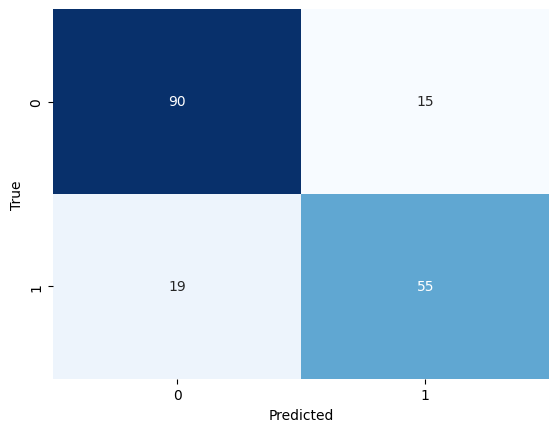

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test,predict)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

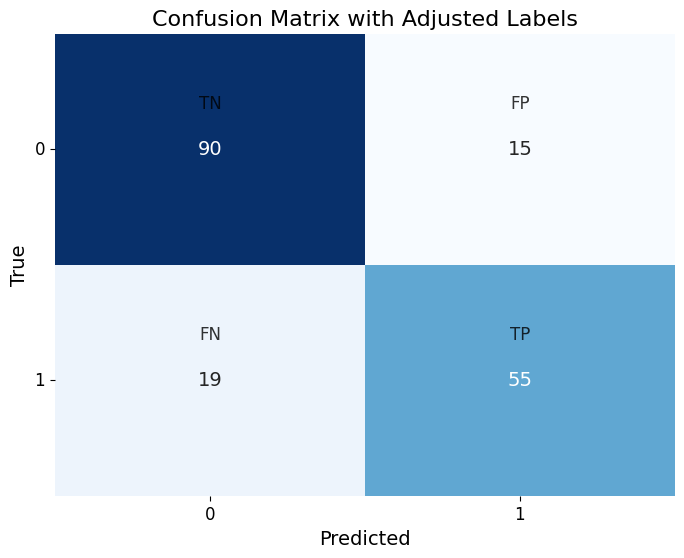

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 샘플 혼동 행렬 생성
conf_matrix = np.array([[90, 15], [19, 55]])
labels = np.array([["TN", "FP"], ["FN", "TP"]])

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})

# TN, FP, FN, TP 레이블 추가 (위쪽으로 약간 이동)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.3, f"{labels[i, j]}", color='black',
                 ha='center', va='center', fontsize=12, alpha=0.8)

# 축 및 제목 설정
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.title('Confusion Matrix with Adjusted Labels', fontsize=16)
plt.xticks(ticks=[0.5, 1.5], labels=['0', '1'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['0', '1'], fontsize=12, rotation=0)
plt.show()


정확도(Accuracy) : 0.81  (TN + TP ) / (TN + FP + FN + TP)

정밀도(Precision) 양성 예측의 정확성 : TP / (TP + FP) 55 / 70 = 0.78

재현율(Recall) 실제 양성중에서 예측 성공비율 : TP / (  FN + TP )

F1_score : 정밀도와 재현율의 조화평균  0.76

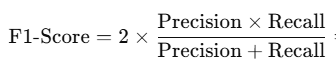

In [ ]:
# LogisticRegression 튜닝
# 파라메터 종류를 확인하고 값의 형태도 확인해서
model = LogisticRegression()
param_grid = {
    'penalty':['l1', 'l2', 'elasticnet', None],
    'dual':[True,False],
    'tol':[0.0001, 0.001,0.01,0.1],
    'C':[1.0,1.5,2.0,2.5],
    'fit_intercept':[True,False],
    'intercept_scaling':[1,2,3],
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter':[100,500,1000]

}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1,scoring='f1', verbose=2)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
best_model = grid_search.best_estimator_
predict = best_model.predict(x_test)
print(classification_report(y_test,predict))

Fitting 10 folds for each of 13824 candidates, totalling 138240 fits


In [45]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



결정트리
  - 루트와 노드
  - 분할기준
    - 지니 불순도 : 불순도를 최소화하도록 데이터를 분리
    - 정보 이득 : 분할 전후의 엔트로피 감소를 기반으로 데이터를 나눔
  - 과적합발생"
    - 가지치기


In [71]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [72]:
# 예측 및 평가
predict = model.predict(x_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



성능을 높이기 위해서
  - 하이퍼 파라메터 튜닝
    - 그리드 서치
      - 주어진 조합에서 전부 case by case
    - 랜덤 서치
      - 주어진 조합에서 랜덤하게 가능한조합을 탐색

In [103]:
from sklearn.model_selection import GridSearchCV
# 파라메터의 조합
model = DecisionTreeClassifier()
param_grid = {
    'max_depth': [3, 5, 7, 10],          # 트리 깊이
    'min_samples_split': [2, 5, 10],           # 분할을 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],             # 리프 노드를 위한 최소 샘플 수
    'criterion': ['gini', 'entropy'],         # 분할 기준
    'max_features': ['sqrt', 'log2']    # 최대 특성 수
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1,scoring='f1', verbose=2)
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=2)

In [104]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [105]:
best_model = grid_search.best_estimator_
predict = best_model.predict(x_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       105
           1       0.85      0.76      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179



KNN : 최근접 이웃 알고리즘
  - 가장 가까운 거리에 있는 k개의 데이터를 찾아서.. 분류나 회귀

In [106]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [107]:
predict = model.predict(x_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.71      0.83      0.76       105
           1       0.68      0.51      0.58        74

    accuracy                           0.70       179
   macro avg       0.69      0.67      0.67       179
weighted avg       0.70      0.70      0.69       179



In [108]:
# 튜닝
param_grid = {  'n_neighbors': [3,5,7,9,11] }
model = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1,scoring='f1', verbose=2)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
best_model = grid_search.best_estimator_
predict = best_model.predict(x_test)
print(classification_report(y_test,predict))

Fitting 10 folds for each of 5 candidates, totalling 50 fits
{'n_neighbors': 3}
              precision    recall  f1-score   support

           0       0.70      0.87      0.77       105
           1       0.71      0.47      0.57        74

    accuracy                           0.70       179
   macro avg       0.71      0.67      0.67       179
weighted avg       0.71      0.70      0.69       179

